# S&P 500 週足 メディアン統計

In [16]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'GSPC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00-04:00,4202.750000,4465.399902,4161.720215,4463.120117,30540660000,0.0,0.0
2022-03-21 00:00:00-04:00,4462.399902,4546.029785,4424.299805,4543.060059,22611740000,0.0,0.0
2022-03-28 00:00:00-04:00,4541.089844,4637.299805,4507.569824,4545.859863,23169700000,0.0,0.0
2022-04-04 00:00:00-04:00,4547.970215,4593.450195,4450.040039,4488.279785,23239490000,0.0,0.0
2022-04-11 00:00:00-04:00,4462.640137,4471.000000,4381.339844,4392.589844,16329620000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


In [18]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,2508.590088,2562.979980,2280.520020,2304.919922,41985050000,0.0,0.0
2020-03-23 00:00:00-04:00,2290.709961,2637.010010,2191.860107,2541.469971,37243200000,0.0,0.0
2020-03-30 00:00:00-04:00,2558.979980,2641.389893,2447.489990,2488.649902,30852490000,0.0,0.0
2020-04-06 00:00:00-04:00,2578.280029,2818.570068,2574.570068,2789.820068,27229510000,0.0,0.0
2020-04-13 00:00:00-04:00,2782.459961,2879.219971,2721.169922,2874.560059,27176880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


## Moving Median

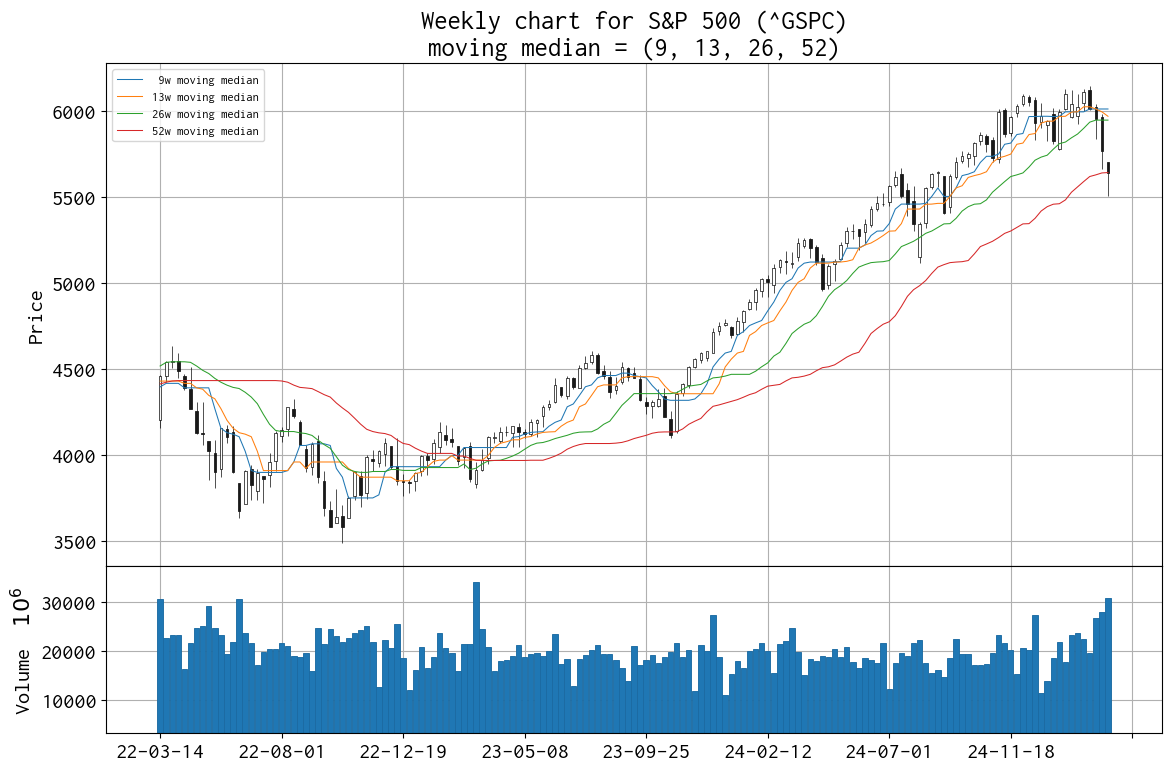

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,5968.330078,5986.089844,5666.290039,5770.200195,27908150000,0.0,0.0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5504.649902,5638.939941,30744569000,0.0,0.0


In [21]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    5770.200195
2025-03-10 00:00:00-04:00    5638.939941
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00           NaN
2025-03-10 00:00:00-04:00   -131.260254
Name: Close, dtype: float64

In [23]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -66.430176
dtype: float64

In [24]:
df['Close'].rolling(9).median().tail()

Date
2025-02-10 00:00:00-05:00    5996.660156
2025-02-17 00:00:00-05:00    6013.129883
2025-02-24 00:00:00-05:00    6013.129883
2025-03-03 00:00:00-05:00    6013.129883
2025-03-10 00:00:00-04:00    6013.129883
Name: Close, dtype: float64

In [25]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00-05:00    6025.990234
2025-02-17 00:00:00-05:00    6025.990234
2025-02-24 00:00:00-05:00    6013.129883
2025-03-03 00:00:00-05:00    5996.660156
2025-03-10 00:00:00-04:00    5970.839844
Name: Close, dtype: float64

In [26]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00-05:00    5900.735107
2025-02-17 00:00:00-05:00    5936.660156
2025-02-24 00:00:00-05:00    5948.485107
2025-03-03 00:00:00-05:00    5948.485107
2025-03-10 00:00:00-04:00    5948.485107
Name: Close, dtype: float64

In [27]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00-05:00    5591.270020
2025-02-17 00:00:00-05:00    5620.685059
2025-02-24 00:00:00-05:00    5630.314941
2025-03-03 00:00:00-05:00    5641.504883
2025-03-10 00:00:00-04:00    5643.669922
Name: Close, dtype: float64

## Robust Bollinger's bands

In [28]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,2508.590088,2562.979980,2280.520020,2304.919922,41985050000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,2290.709961,2637.010010,2191.860107,2541.469971,37243200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,2558.979980,2641.389893,2447.489990,2488.649902,30852490000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,2578.280029,2818.570068,2574.570068,2789.820068,27229510000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,2782.459961,2879.219971,2721.169922,2874.560059,27176880000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0,5867.645020,5731.142334,5996.380127,5333.285645,6394.236816
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0,5900.735107,5741.394897,6018.657715,5325.500671,6434.551941
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0,5936.660156,5765.332397,6022.775146,5379.168274,6408.939270


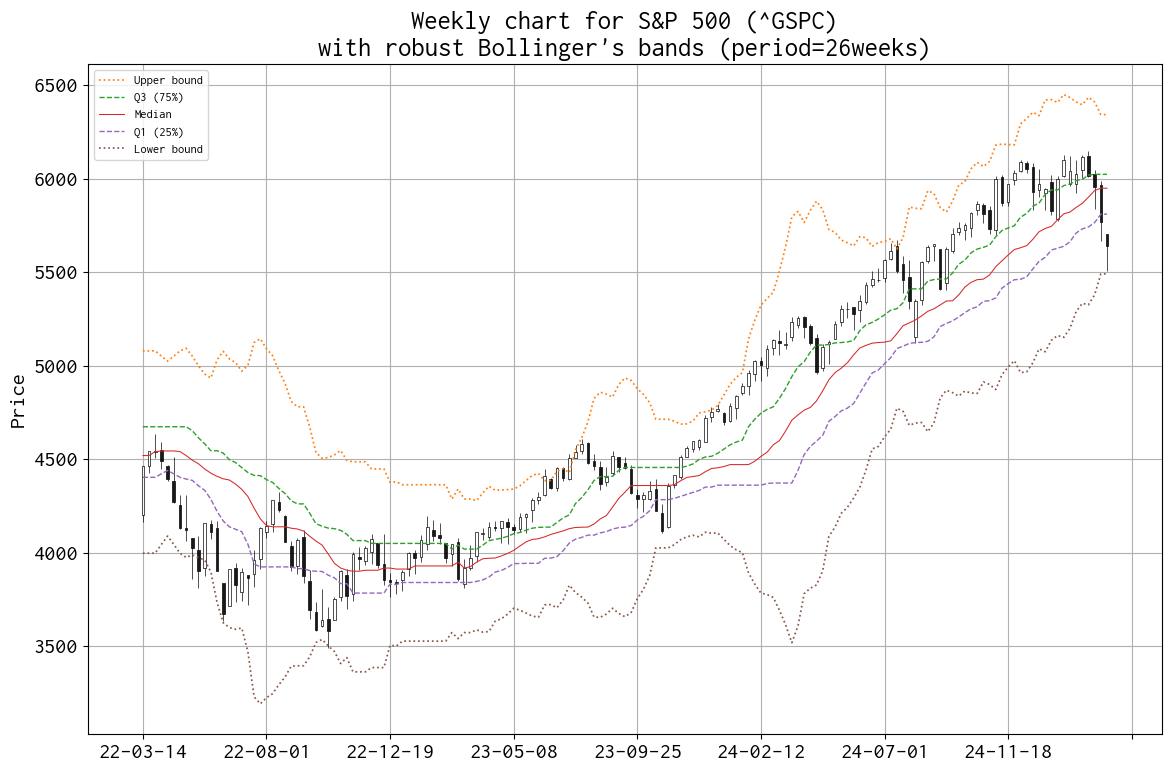

In [29]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

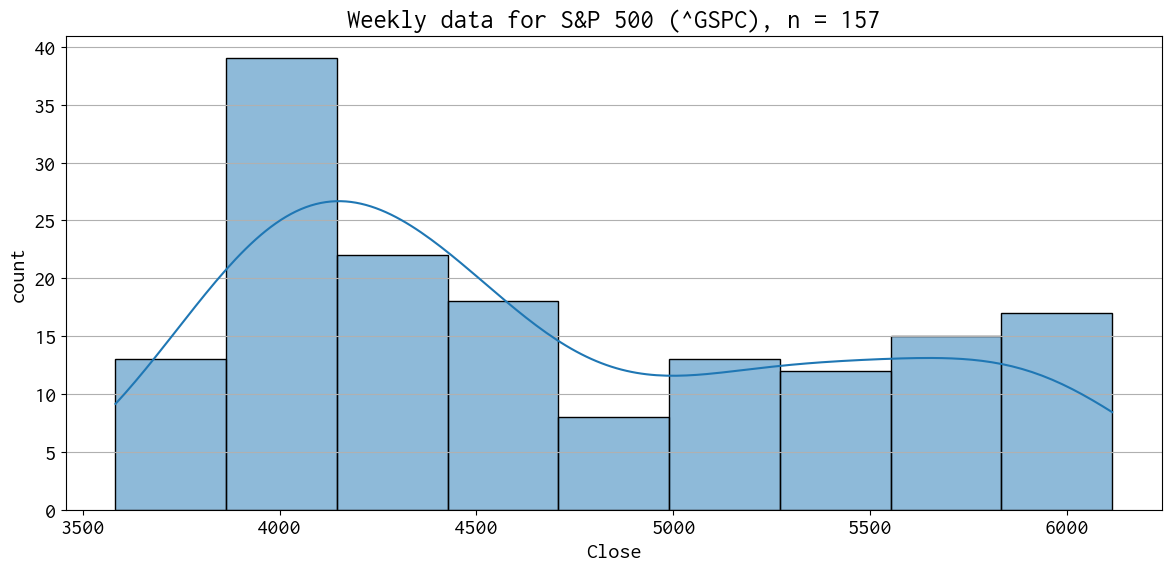

In [30]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()